In [450]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import ttest_ind

%matplotlib inline

In [170]:
input = '/home/luotao/stock/data/GSE58904_series_matrix.txt'
df = pd.read_table(input,skiprows=64,skipfooter=1)

# 取后三列
df = df.iloc[:,1:]
df_col = df.columns
df

/tmp/ipykernel_189171/1397676247.py:2: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_table(input,skiprows=64,skipfooter=1)


,GSM1422130,GSM1422131,GSM1422132,GSM1422133,GSM1422134,GSM1422135,GSM1422136,GSM1422137,GSM1422138,GSM1422139,GSM1422140,GSM1422141
0,8.038452,7.892337,7.963078,7.938274,7.804914,7.899894,7.865767,7.767526,8.065381,7.657024,7.363317,7.860210
1,4.913134,4.918667,4.923530,4.939733,4.978066,4.900529,4.942882,4.928831,4.951668,4.931795,4.955970,4.966612
2,5.178883,5.172847,5.244185,5.106273,5.088142,5.148145,5.177364,5.106889,5.163706,5.156961,5.172498,5.181584
3,9.025212,9.049269,9.030318,9.193461,9.076748,9.067702,8.749135,8.924459,8.383306,8.779385,8.670965,8.661668
4,6.511699,6.905541,6.349451,6.613377,6.661546,6.420311,6.564802,7.021280,6.417160,6.860541,6.774095,6.278810
...,...,...,...,...,...,...,...,...,...,...,...,...
28864,9.769721,9.810926,9.732901,9.774265,9.790538,9.729522,9.710066,9.805544,9.733744,9.663055,9.596554,9.572948
28865,10.649714,10.638118,10.688132,10.784095,10.717866,10.806675,10.694156,10.842153,10.762188,10.702826,10.840978,10.750757
28866,9.608500,9.615105,9.681510,9.597713,9.550662,9.457661,9.708408,9.734822,9.778762,9.494643,9.582783,9.338966
28867,11.292311,11.231095,11.351870,11.399743,11.303994,11.566926,11.513368,11.539480,11.839635,11.263108,11.267069,11.395099


<Axes: >

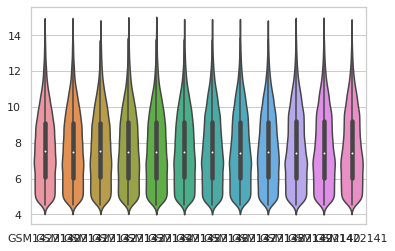

In [148]:
sns.violinplot(data=df)

<Axes: >

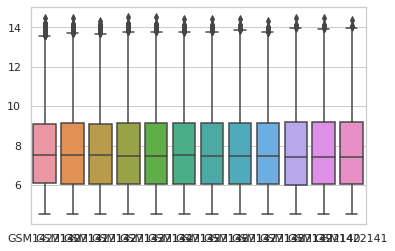

In [149]:
sns.boxplot(data=df)

In [222]:
from sklearn.decomposition import PCA

# target #居然要制成数组才能用,按样品位置排序
df_target = np.array(['HCT116-ko-M-H1047R','HCT116-ko-M-H1047R','HCT116-ko-M-H1047R', \
                'HCT116-ko-WT', 'HCT116-ko-WT', 'HCT116-ko-WT', \
               'DLD1-ko-M-E545K','DLD1-ko-M-E545K','DLD1-ko-M-E545K',\
               'DLD1-ko-WT','DLD1-ko-WT','DLD1-ko-WT'])
# 转置,获得矩阵
pca_df = df.transpose()

# 创建模型
pca = PCA(n_components=2)

# 数据拟合
pca.fit(pca_df)

# 降维后的结果
pca_df = pca.transform(pca_df) 
pca_df,df_target

(array([[ 50.18570013, -10.61476953],
        [ 47.47792028, -12.61171292],
        [ 46.62780986,   6.69443368],
        [ 47.75619482,  -0.27865208],
        [ 47.54204417,  -3.64658896],
        [ 43.51405072,  21.23535059],
        [-45.0489049 ,  -5.78523719],
        [-48.16852564,  -9.26794319],
        [-43.12328334,  13.15737059],
        [-48.91737731,  -4.35620912],
        [-48.75595795,  -6.1548973 ],
        [-49.08967083,  11.62885542]]),
 array(['HCT116-ko-M-H1047R', 'HCT116-ko-M-H1047R', 'HCT116-ko-M-H1047R',
        'HCT116-ko-WT', 'HCT116-ko-WT', 'HCT116-ko-WT', 'DLD1-ko-M-E545K',
        'DLD1-ko-M-E545K', 'DLD1-ko-M-E545K', 'DLD1-ko-WT', 'DLD1-ko-WT',
        'DLD1-ko-WT'], dtype='<U18'))

/tmp/ipykernel_189171/2430389865.py:32: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  h = ax.scatter(pca_df[df_target == j, 0], pca_df[df_target == j, 1], c=colors[j], alpha=0.8)


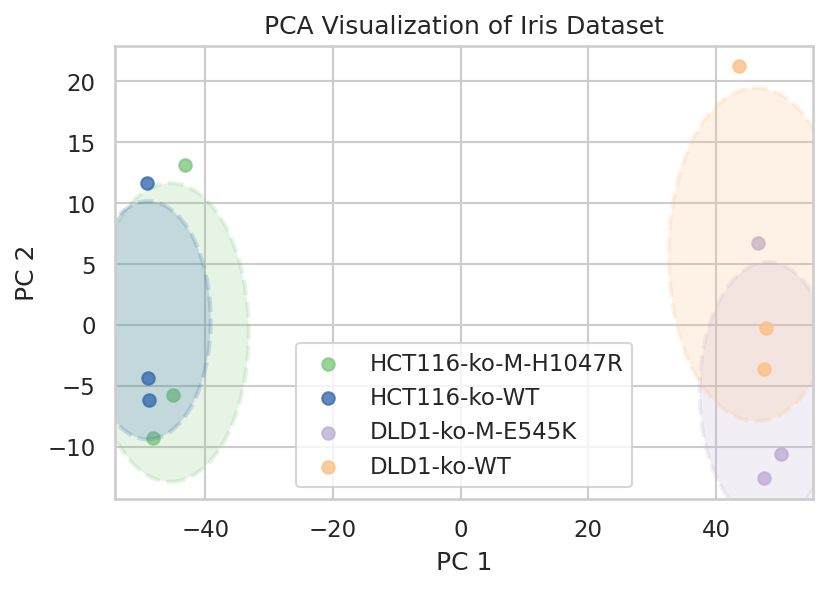

In [495]:
plt.rcParams['figure.dpi'] = 150

# 绘制散点图
fig, ax = plt.subplots()

# 创建颜色字典和标签列表
colors = {'HCT116-ko-M-H1047R':plt.get_cmap('Accent')(1), 'HCT116-ko-WT':plt.get_cmap('Accent')(2), \
          'DLD1-ko-M-E545K':plt.get_cmap('Accent')(0), 'DLD1-ko-WT':plt.get_cmap('Accent')(4)}


labels = ['HCT116-ko-M-H1047R',     'HCT116-ko-WT',    'DLD1-ko-M-E545K',     'DLD1-ko-WT']

handles = []

# 将同类别的点拟合并画出圆圈


#     使用 cov() 函数计算协方差矩阵，
#     并使用 SVD 分解来获得扰动向量。
#     最后，我们使用 arrow() 函数画箭头来表示扰动向量。

for j in np.unique(df_target):
    xj = pca_df[df_target == j, :]  # df_target == j找到样品定位的位置[False,True,False] ，xj筛选出具体的行
    mean_j = np.mean(xj, axis=0)    # 按列算出均值
    cov_j = np.cov(xj.T)            # xj.T矩阵转置，求出协方差（xj的协方差）
    u_j, s_j, v_j = np.linalg.svd(cov_j)
    w_j = 2.0 * np.sqrt(s_j[0]) * u_j[:, 0]
    circ_j = plt.Circle(mean_j, radius=np.sqrt(s_j[0]), color=colors[j],
                        fill=True, linewidth=2, alpha = 0.2, linestyle='--')
    ax.add_artist(circ_j)
    # 绘制散点图
    h = ax.scatter(pca_df[df_target == j, 0], pca_df[df_target == j, 1], c=colors[j], alpha=0.8)
    handles.append(h)

# 添加标签和标题
ax.set_xlabel('PC 1')
ax.set_ylabel('PC 2')
ax.set_title('PCA Visualization of Iris Dataset')


# 添加图例
for j in np.unique(df_target):
    circ_j = plt.Circle((-100,-100), radius=0, color=colors[j], fill=False,
                        linewidth=2)
    h = ax.add_artist(circ_j)
    handles.append(h)
ax.legend(handles, labels)

In [490]:
for j in np.unique(df_target):
    site = np.where(df_target == j)     
    site_list = [i for i in site[0]]    
    df.iloc[:,site_list]                
    

def cut_df(sample:str,df_target,dateframe):
    site = np.where(df_target == sample) # 定位true的位置
    site_list = [i for i in site[0]]    # 定位后转化成列表
    return df.iloc[:,site_list]         # 切片切除分组

vname = 'HCT116-ko-M-H1047R_VS_DLD1-ko-WT'

def contrasts(df_1,df_2,vname):
    out_df = pd.merge(df_1,df_2, right_index=True,left_index=True)
    vname_logfc,t_values = vname + '_log_fc',[]
    vname_P_value,P_values = vname + '_P_value',[]
    up_down_value,up_down_list = 'Signifcant',[]
    for i,j in zip(cut_df('HCT116-ko-M-H1047R',df_target,df).iterrows(),cut_df('DLD1-ko-WT',df_target,df).iterrows()):
        # log_fold change 
        log_fc = np.log2(i[1].mean() / j[1].mean())
        t_values.append(log_fc)
        
        # T test
        t_statistic, p_value = stats.ttest_ind(i[1], j[1])
        P_values.append(-np.log10(p_value))
        
        # mark 
        if log_fc >= 0.5:
            up_down_list.append("Up")
        elif -0.5<log_fc<0.5:
            up_down_list.append("Not")
        else:
            up_down_list.append("Down")
        
    out_df[vname_logfc] = t_values
    out_df[vname_P_value] = P_values
    out_df[up_down_value] = up_down_list
    
    return out_df



df_1 = cut_df('HCT116-ko-M-H1047R',df_target,df)
df_2 = cut_df('DLD1-ko-WT',df_target,df)

log_P_df = contrasts(df_1,df_2,vname)

In [494]:
log_P_df

,GSM1422130,GSM1422131,GSM1422132,GSM1422139,GSM1422140,GSM1422141,HCT116-ko-M-H1047R_VS_DLD1-ko-WT_log_fc,HCT116-ko-M-H1047R_VS_DLD1-ko-WT_P_value,Signifcant
0,8.038452,7.892337,7.963078,7.657024,7.363317,7.860210,0.062519,1.056162,Not
1,4.913134,4.918667,4.923530,4.931795,4.955970,4.966612,-0.009652,1.431336,Not
2,5.178883,5.172847,5.244185,5.156961,5.172498,5.181584,0.007872,0.518777,Not
3,9.025212,9.049269,9.030318,8.779385,8.670965,8.661668,0.053834,2.997699,Not
4,6.511699,6.905541,6.349451,6.860541,6.774095,6.278810,-0.010672,0.069776,Not
...,...,...,...,...,...,...,...,...,...
28864,9.769721,9.810926,9.732901,9.663055,9.596554,9.572948,0.023869,1.985930,Not
28865,10.649714,10.638118,10.688132,10.702826,10.840978,10.750757,-0.014303,1.155303,Not
28866,9.608500,9.615105,9.681510,9.494643,9.582783,9.338966,0.024601,1.019693,Not
28867,11.292311,11.231095,11.351870,11.263108,11.267069,11.395099,-0.002128,0.108230,Not


Text(64.05250000000001, 0.5, '-log10(Adjust P-Value)')

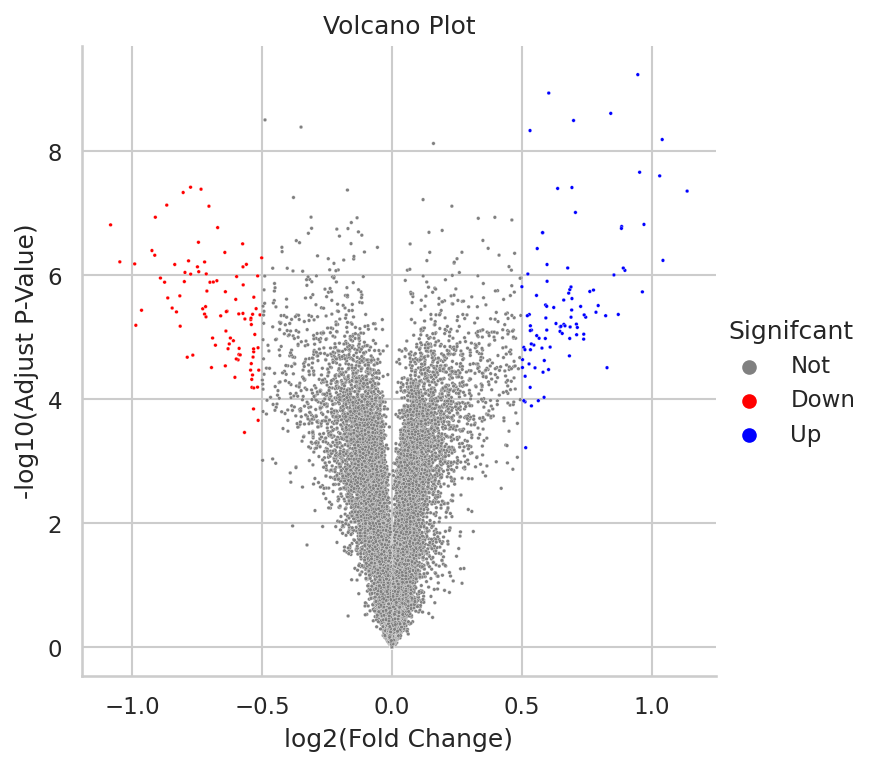

In [498]:
plt.rcParams['figure.dpi'] = 150
sns.relplot(data=log_P_df,x='HCT116-ko-M-H1047R_VS_DLD1-ko-WT_log_fc',y='HCT116-ko-M-H1047R_VS_DLD1-ko-WT_P_value',s=3, \
           hue='Signifcant', palette=["gray", "red", "blue"])


# 添加标题和轴标签
plt.title('Volcano Plot')
plt.xlabel('log2(Fold Change)')
plt.ylabel('-log10(Adjust P-Value)')

In [459]:
vname = 'HCT116-ko-M-H1047R_VS_DLD1-ko-WT'
for i,j in zip(cut_df('HCT116-ko-M-H1047R',df_target,df).iterrows(),cut_df('DLD1-ko-WT',df_target,df).iterrows()):
    #print(i[1].mean(),j[1].mean())
    log_fc = np.log2(i[1].mean() / j[1].mean())
    t_statistic, p_value = stats.ttest_ind(i[1], j[1])
    break

(0.06251855742608636, 0.08786955819891659)

In [343]:
df

,GSM1422130,GSM1422131,GSM1422132,GSM1422133,GSM1422134,GSM1422135,GSM1422136,GSM1422137,GSM1422138,GSM1422139,GSM1422140,GSM1422141
0,8.038452,7.892337,7.963078,7.938274,7.804914,7.899894,7.865767,7.767526,8.065381,7.657024,7.363317,7.860210
1,4.913134,4.918667,4.923530,4.939733,4.978066,4.900529,4.942882,4.928831,4.951668,4.931795,4.955970,4.966612
2,5.178883,5.172847,5.244185,5.106273,5.088142,5.148145,5.177364,5.106889,5.163706,5.156961,5.172498,5.181584
3,9.025212,9.049269,9.030318,9.193461,9.076748,9.067702,8.749135,8.924459,8.383306,8.779385,8.670965,8.661668
4,6.511699,6.905541,6.349451,6.613377,6.661546,6.420311,6.564802,7.021280,6.417160,6.860541,6.774095,6.278810
...,...,...,...,...,...,...,...,...,...,...,...,...
28864,9.769721,9.810926,9.732901,9.774265,9.790538,9.729522,9.710066,9.805544,9.733744,9.663055,9.596554,9.572948
28865,10.649714,10.638118,10.688132,10.784095,10.717866,10.806675,10.694156,10.842153,10.762188,10.702826,10.840978,10.750757
28866,9.608500,9.615105,9.681510,9.597713,9.550662,9.457661,9.708408,9.734822,9.778762,9.494643,9.582783,9.338966
28867,11.292311,11.231095,11.351870,11.399743,11.303994,11.566926,11.513368,11.539480,11.839635,11.263108,11.267069,11.395099


In [304]:
import statsmodels.stats.multitest as smt

# 原始 p 值列表
p_values = [0.001, 0.005, 0.01, 0.02, 0.05, 0.1]

# 进行多重比较校正
adjusted_p_values = smt.multipletests(p_values, method='fdr_bh')[1]

# 输出结果
print("原始 p 值：", p_values)
print("调整后的 p 值：", adjusted_p_values)


原始 p 值： [0.001, 0.005, 0.01, 0.02, 0.05, 0.1]
调整后的 p 值： [0.006 0.015 0.02  0.03  0.06  0.1  ]
